<a href="https://colab.research.google.com/github/AnwarMirza/SEP740-Deep-Learning-McMaster-Summer2023/blob/main/05checkinVideo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check-in Video 1: Standard Backpropagation

## Steps
- Step 1: Load Data and Initialization
- Step 2: Feedforward of the signals
- Step 3: Backpropagation of Errors
- Step 4: Update Weights
- Step 5: Convergence Check

In [ ]:
# import necessary libraries
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# initialize random number generator
rng = np.random.default_rng(10)

In [ ]:
# Helper functions

def activationFunc(x):
  # bipolar sigmoid
  return ((1-np.exp(-x))/(1+np.exp(-x)))

def dActivationFunc(fx):
  # derivative of the bipolar sigmoid
  return (0.5*(1-fx)*(1+fx))

def feedforward(x, b1, w1, b2, w2):
  # weighted sum of inputs reaching at the hidden units
  z1 = b1 + np.dot(w1, x)
  # output of the hidden units (applying activation function)
  a1 = activationFunc(z1)
  da1 = dActivationFunc(a1)

  # weighted sum of inputs reaching at the output units
  z2 = b2 + np.dot(w2,a1)
  # output of the output units (applying activation function)
  a2 = activationFunc(z2)
  da2 = dActivationFunc(a2)
  return (z1, a1, da1, z2, a2, da2)

def backprop(learningRate, xtrain, ytrain, b1, w1, b2, w2):

  N = ytrain.shape[0]

  # feedforward the signal
  z1, a1, da1, z2, a2, da2 = feedforward(xtrain, b1, w1, b2, w2)

  # calculate error
  err = msError(a2, ytrain)

  # error at the output layer
  dif = a2 - ytrain

  # local gradients (deltas) at the output units
  deltaOut = dif  * da2
  # calculate weights and bias changes
  deltaW2 = -learningRate * np.dot(deltaOut,a1.T)/N
  deltaB2 = -learningRate * deltaOut/N

  # local gradients (deltas) at the hidden units
  deltaInHid = np.dot(w2.T, deltaOut)
  deltaHid = deltaInHid * da1
  # calculate weights and bias changes
  deltaW1 = -learningRate * np.dot(deltaHid, xtrain.T)/N
  deltaB1 = -learningRate * deltaHid/N

  return (deltaB1, deltaW1, deltaB2, deltaW2, err)

def msError(yPredicted, yTrue):
  diff = yPredicted - yTrue
  error = np.dot(diff.T, diff) /(2*yTrue.shape[0])
  return (error)

In [ ]:
# load the data
samples = np.array([
    (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
    (9, 8, 7, 6, 5, 4, 3, 2, 1, 0),
    (0, 9, 1, 8, 2, 7, 3, 6, 4, 5),
    (4, 5, 6, 3, 2, 7, 1, 8, 0, 9),
    (3, 8, 2, 7, 1, 6, 0, 5, 9, 4),
    (1, 6, 0, 7, 4, 8, 3, 9, 2, 5),
    (2, 1, 3, 0, 4, 9, 5, 8, 6, 7),
    (9, 4, 0, 5, 1, 6, 2, 7, 3, 8)
    ])
targets = np.array([
    (-1, -1),
    (1, 1),
    (-1, 1),
    (1, -1),
    (1, 1),
    (1, -1),
    (-1, 1),
    (-1, -1)
    ])

# split the data into training and testing sets
# For this case we will use all data as training data


In [ ]:

# Initialize network parameters
learningRate = 0.1
maxIterations = 100001
epsilon = 0.0001
nSamples = samples.shape[0]
Ni = 10  # Ni input neurons
Nh = 4   # Nh hidden neurons
No = 2   # No output neurons

# Initialize weights and bias (random numbers between -1 and +1)
# x = a + (b-a) * rng.random()
b1 = -1 + 2 * rng.random((Nh,1))
w1 = -1 + 2 * rng.random((Nh, Ni))
b2 = -1 + 2 * rng.random((No,1))
w2 = -1 + 2 * rng.random((No, Nh))

xaxis = np.zeros((maxIterations,1))
errPlot = np.zeros((maxIterations,1))


In [ ]:

for itr in range(1,maxIterations):
  maxError = 0
  for iSample in range(0, nSamples):
    xtrain = samples[iSample,:].reshape(Ni,1)
    ytrain = targets[iSample,:].reshape(No,1)

    # backprop()
    deltaB1, deltaW1, deltaB2, deltaW2, err = backprop(learningRate, xtrain, ytrain, b1, w1, b2, w2)

    if err > maxError:
      maxError = err

    # Weight change
    b1 = b1 + deltaB1
    w1 = w1 + deltaW1
    b2 = b2 + deltaB2
    w2 = w2 + deltaW2


  xaxis[itr], errPlot[itr] = itr, maxError
  if maxError < epsilon:
    print('Converged with maxError = ', maxError)
    itrm = itr
    break

  # print('itr = ', itr, ' maxError = ', maxError)

if itr >= maxIterations:
  print('Maximum iterations reached!')

print('itr = ', itr, ' maxError = ', maxError, ' epsilon = ', epsilon)



Converged with maxError =  [[9.99995696e-05]]
itr =  19259  maxError =  [[9.99995696e-05]]  epsilon =  0.0001


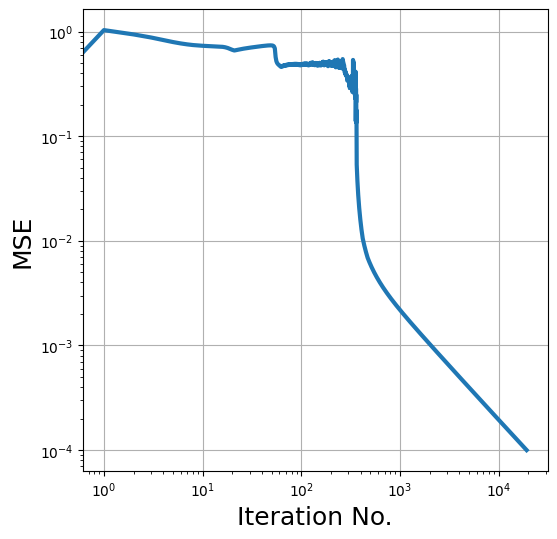

In [ ]:
fig = plt.figure(figsize=(6,6))
# plt.plot(errPlot, linewidth=3)
# plt.semilogy(xaxis[:itrm], errPlot[:itrm], linewidth=3)
plt.loglog(xaxis[:itrm], errPlot[:itrm], linewidth=3)
plt.xlabel('Iteration No.', fontsize=18)
plt.ylabel('MSE', fontsize=18)
plt.grid()
plt.show()


In [ ]:

# Testing
iSample = 4 #int(np.round(1 + (8-1)*rng.random()))
print('iSample = ', iSample)
xtrain = samples[iSample,:].reshape(Ni,1)
ytrain = targets[iSample,:].reshape(No,1)
# feedforward the signal
z1, a1, da1, z2, yPredict, da2 = feedforward(xtrain, b1, w1, b2, w2)
print('ytrain = ', ytrain.T)
print('yPredict = ', np.round(yPredict).T)

iSample =  4
ytrain =  [[1 1]]
yPredict =  [[1. 1.]]
